Linear Regression in One Variable
===

### by [Abien Fred Agarap](https://github.com/AFAgarap)

This is a linear approach for modeling the relationship between a scalar dependent variable $y$ and one or more independent variables $x$.

If the correlation coefficient indicates that the data can be used for prediction, and the scatter plot of data seems to form a straight line, that's the time to use linear regression. Recall that the equation of a straight line is $y = mx + b$, the notation may vary -- this is the linear regression equation. To get the values $m$ and $b$ for the equation, we use the following formulas:

\\[b = \dfrac{(\sum{y})(\sum{x^2}) - (\sum{x})(\sum{xy})}{n(\sum{x^2}) - (\sum{x})^2}\\]

\\[m = \dfrac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^2}) - (\sum{x})^2}\\]

Let us use the following data:

Subject|Age (x)|Glucose Level (y)|
-------|-------|-----------------|
0|43|99|
1|21|65|
2|25|79|
3|42|75|
4|57|87|
5|59|81|
$\sum$|247|486|

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[43, 99], [21, 65], [25, 79], [42, 75], [57, 87], [59, 81]])

In [2]:
# isolate the x variable
x = data[:, 0]

# isolate the y variable
y = data[:, 1]

In [3]:
# let's implement the formula
b = (np.sum(y) * np.sum(x**2) - np.sum(x) * np.sum(x * y)) / (data.shape[0] * np.sum(x**2) - np.sum(x)**2)
m = (data.shape[0] * (np.sum(x*y)) - np.sum(x) * np.sum(y)) / (data.shape[0] * np.sum(x**2) - np.sum(x)**2)

In [4]:
# display the equation coefficients
print('b : {}'.format(b))
print('m : {}'.format(m))

b : 65.1415715245131
m : 0.3852249832102082


Thus, we have the following linear regression equation: $y = 0.385225x + 65.1416$

In [5]:
def fn(x):
    return m * x.astype(np.float64) + b

In [6]:
print([element for element in x])
print([fn(element) for element in x])

[43, 21, 25, 42, 57, 59]
[81.70624580255205, 73.23129617192747, 74.7721961047683, 81.32102081934184, 87.09939556749497, 87.86984553391538]


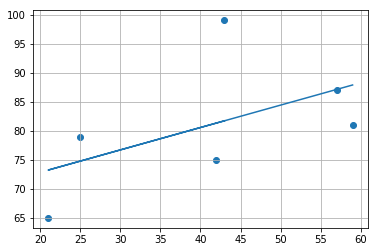

In [7]:
figure_regression = plt.figure()
f_axes = figure_regression.add_subplot(111)
f_axes.scatter(x, y)
f_axes.plot(x, [fn(element) for element in x])


# add a grid
plt.grid()

# show the plot
plt.show()

### Scikit-learn

What we just did was the Pearson method for Linear Regression. Scikit-learn provides a linear regression model that uses a learning algorithm such as Gradient Descent, and it only takes a couple lines of codes.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# the np.reshape is needed here as we are dealing with single variable case
# the model demands for a data with shape [?, 1]
model.fit(np.reshape(x, newshape=(-1, 1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

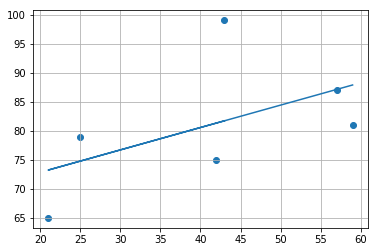

In [9]:
figure_regression_sklearn = plt.figure()
f_axes = figure_regression_sklearn.add_subplot(111)
f_axes.scatter(x, y)
f_axes.plot(x, model.predict(np.reshape(x, newshape=(-1, 1))))

plt.grid()

plt.show()

## Gradient Descent

The Gradient Descent is an incremental method for stochastic approximation of an objective function. Mathematically, it is the sum of differentiable functions that aims to determine the minima of the objective function through iteration.

In machine learning, each gradient descent iteration optimizes an objective function based on the loss value (also known as _error value_). In other words, through gradient descent, we attempt to determine the most optimal "version" of a given model (e.g. linear regression).

Take for example the following data,

In [10]:
data = np.genfromtxt('../datasets/cricket_chirps.csv', delimiter=',')[1:]

In [11]:
data[:10]

array([[20.        , 88.59999847],
       [16.        , 71.59999847],
       [19.79999924, 93.30000305],
       [18.39999962, 84.30000305],
       [17.10000038, 80.59999847],
       [15.5       , 75.19999695],
       [14.69999981, 69.69999695],
       [17.10000038, 82.        ],
       [15.39999962, 69.40000153],
       [16.20000076, 83.30000305]])

Let's see the scatterplot of the data to see if Linear Regression is applicable. 

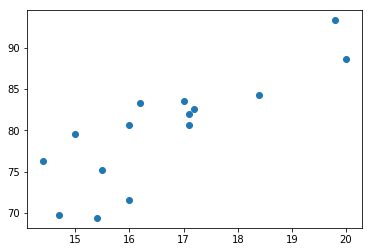

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

From the scatterplot, we can infer that we may apply Linear Regression as they somehow form a linear pattern. Take note that this decision was a qualitative approach, for a quantitative approach, you may use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

Now, you'll be thinking we can apply the closed-form solution we did above to get the Linear Regression equation. But no, we are not. We are going to implement the Gradient Descent algorithm (as it is the section we are in now). Why? In some cases, it is computationally more efficient. For a detailed answer, refer to this [answer](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution) in Cross Validated.

Before defining the gradient descent algorithm, we must first know how are we going to measure the error value of the linear regression prediction, and it is through the Least-Squares cost function,

$$ J(w) = \dfrac{1}{2} \sum_{i}^{N} (wx+b - y)^{2} $$

where $y$ is the actual value, and $wx+b$ is the predicted value.

Our goal is to minimize the error of our predictions, $\min J(w)$. Here comes in the gradient descent algorithm. What it does is to start its search for the most optimal $w$ with some arbitrary "guess". Then, it repeatedly changes $w$ to make $J(w)$ smaller until it convergence. The gradient descent has the following update rule

$$ w_{i} = w_{i} - \alpha \dfrac{\partial}{\partial w_{i}} J(w) $$

where $\alpha$ is the **learning rate**. The learning rate dictates how fast or how slow does the algorithm learn. There is **no definite rule** for setting the learning rate, we accomplish this through trial-and-error. However, some default values we use would be 0.01, 0.001, and 0.0001 among others. It depends on your data and learning algorithm.

To implement this algorithm, we have to take the partial derivative of our cost function with respect to $w$. That is, we must know how much influence does the $w$ has on the predictions. For now, we shall work it out for a single-variable case,

$$ \dfrac{\partial}{\partial w_{i}} J(w) = \dfrac{\partial}{\partial w_{i}} \dfrac{1}{2} (wx+b - y)^{2} \\
= 2 \cdot \dfrac{1}{2} (wx+b - y) \cdot \dfrac{\partial}{\partial w_{i}} (wx+b - y) \\
= (wx+b - y) \cdot \dfrac{\partial}{\partial w_{i}} (wx+b - y) \\
\dfrac{\partial J(w)}{\partial w_{i}} = (wx+b - y) \cdot x $$

Hence, we have the following algorithm

```
Loop until convergence {
```
$$ w_{i} = w_{i} - \alpha\ (wx+b - y) \cdot x $$
```
}
```

The algorithm we have defined above is the batch gradient descent. By practice, there is no specific value for convergence. Convergence may be said to be reached when changes in error values are almost negligible (infinitesimally small). We set arbitrary values for the loop condition then.

Recall that we stored our dataset to `data`. We shall now store the dataset to a more intuitive set of variables,

In [13]:
x = data[:, 0]
y = data[:, 1]

As we have defined above, the gradient descent algorithm starts with an arbitrary guess. Hence, we use the `np.random.randint` for generating our `w` and `b` variables.

The training procedures boils down to four steps,

(1) Produce some predictions, $h = wx + b$

(2) Measure the error values of the predictions, $\sum_{i}^{n} \dfrac{1}{2} (wx+b - y)^{2}$

(3) Compute for the gradient (partial derivative), $\dfrac{\partial}{\partial w_{i}} = (wx+b - y) \cdot x$

(4) Update the $w$ parameter, $w_{i} = w_{i} - \alpha \cdot \dfrac{\partial J(w)}{\partial w_{i}}$

In [14]:
N = data.shape[0]
w, b = np.random.randint(N), np.random.randint(N)

for e in range(1000):
    h = w * x + b
    
    loss = np.sum(np.square(h - y)) / 2

    if e % 100 == 0 and e != 0:
        print('step {}, loss : {}'.format(e, loss))
    
    grad_w = np.dot((h - y), x)
    
    w -= (1e-4 * grad_w)

step 100, loss : 134.35850812662514
step 200, loss : 134.35850812662514
step 300, loss : 134.35850812662514
step 400, loss : 134.35850812662514
step 500, loss : 134.35850812662514
step 600, loss : 134.35850812662514
step 700, loss : 134.35850812662514
step 800, loss : 134.35850812662514
step 900, loss : 134.35850812662514


Let's display the resulting $w$ from the gradient descent.

In [15]:
print('b : {}'.format(b))
print('m : {}'.format(m))

b : 2
m : 0.3852249832102082


Let's display the predictions of our linear regression model.

In [16]:
h

array([95.45358705, 76.76286964, 94.51904763, 87.97729831, 81.90281871,
       74.42652997, 70.6883856 , 81.90281871, 73.95926025, 77.69740906,
       72.09019029, 82.37008842, 76.76286964, 81.43554899, 69.2865809 ])

In [17]:
y

array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
       75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
       79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305])

Let's plot our linear regression model (predictions) against the actual data.

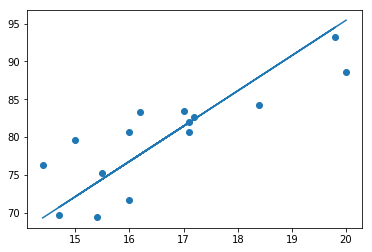

In [18]:
plt.scatter(x, y)
plt.plot(x, (w * x + b))

What we have worked out in this notebook is the batch gradient descent, i.e. scans through the entire training dataset to progress. But what if our training data is too large? That's where **stochastic gradient descent** comes in. A challenge is for you to work on your own to implement SGD which we define as follows,

```
Loop until convergence {
    for j = 0 to n - 1 {
```
$$ w_{j} = w_{j} - \alpha\ (wx+b - y) \cdot x_{j} $$
```
    }
}
```

where $j$ is a "chunk" of the entire training dataset. Theoretically and empirically, SGD converges much faster than batch gradient descent.